In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'pjnk'
DISCOVERY_TIMEOUT_SECONDS=1800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Data

In [2]:
from cdt.data import load_dataset

sachs, sachs_ground_truth = load_dataset('sachs')
sachs

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.20,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.90,40.00
1,35.9,16.50,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.50,61.50
2,59.4,44.10,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.90,19.50
3,73.0,82.80,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.60,23.10
4,33.7,19.80,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.70,81.30
...,...,...,...,...,...,...,...,...,...,...,...
7461,49.1,12.40,32.80,27.90,22.70,11.70,38.2,1144.0,1.00,2.55,1.00
7462,23.3,4.61,17.80,22.10,14.90,48.70,67.3,922.0,1.00,9.82,1.00
7463,28.1,4.49,18.80,20.20,10.20,3.08,21.9,730.0,1.00,1.75,2.00
7464,34.6,7.10,5.73,20.70,15.10,32.20,41.4,813.0,44.50,1382.00,2.44


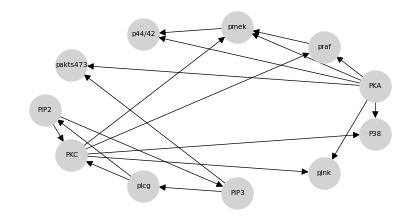

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 2))
nx.draw_shell(sachs_ground_truth, with_labels=True, node_size=500, font_size=5, node_color='lightgray', arrowsize=10, width=0.5)
plt.show()

In [4]:
for x in sachs_ground_truth.nodes():
    paths = list(nx.all_simple_paths(sachs_ground_truth, target=TARGET, source=x))
    print(x, paths)

PIP2 [['PIP2', 'PKC', 'pjnk'], ['PIP2', 'PIP3', 'plcg', 'PKC', 'pjnk']]
PKC [['PKC', 'pjnk']]
plcg [['plcg', 'PIP2', 'PKC', 'pjnk'], ['plcg', 'PKC', 'pjnk']]
PIP3 [['PIP3', 'plcg', 'PIP2', 'PKC', 'pjnk'], ['PIP3', 'plcg', 'PKC', 'pjnk']]
pjnk []
P38 []
PKA [['PKA', 'pjnk']]
praf []
pmek []
p44/42 []
pakts473 []


# Causal-Nest Pipeline

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in sachs.drop(TARGET, axis=1).columns]

dataset = Dataset(data=sachs, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=      praf   pmek   plcg    PIP2   PIP3  p44/42  pakts473     PKA    PKC  \
0     26.4  13.20   8.82   18.30  58.80    6.61      17.0   414.0  17.00   
1     35.9  16.50  12.30   16.80   8.13   18.60      32.5   352.0   3.37   
2     59.4  44.10  14.60   10.20  13.00   14.90      32.5   403.0  11.40   
3     73.0  82.80  23.10   13.50   1.29    5.83      11.8   528.0  13.70   
4     33.7  19.80   5.19    9.73  24.80   21.10      46.1   305.0   4.66   
...    ...    ...    ...     ...    ...     ...       ...     ...    ...   
7461  49.1  12.40  32.80   27.90  22.70   11.70      38.2  1144.0   1.00   
7462  23.3   4.61  17.80   22.10  14.90   48.70      67.3   922.0   1.00   
7463  28.1   4.49  18.80   20.20  10.20    3.08      21.9   730.0   1.00   
7464  34.6   7.10   5.73   20.70  15.10   32.20      41.4   813.0  44.50   
7465  30.5   1.01   7.30  173.00  22.90    6.61      13.7   890.0   1.00   

          P38   pjnk  
0       44.90  40.00  
1       16.50  61.50  
2    

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Sachs', ground_truth=sachs_ground_truth)
problem

Problem(dataset=Dataset(data=      praf   pmek   plcg    PIP2   PIP3  p44/42  pakts473     PKA    PKC  \
0     26.4  13.20   8.82   18.30  58.80    6.61      17.0   414.0  17.00   
1     35.9  16.50  12.30   16.80   8.13   18.60      32.5   352.0   3.37   
2     59.4  44.10  14.60   10.20  13.00   14.90      32.5   403.0  11.40   
3     73.0  82.80  23.10   13.50   1.29    5.83      11.8   528.0  13.70   
4     33.7  19.80   5.19    9.73  24.80   21.10      46.1   305.0   4.66   
...    ...    ...    ...     ...    ...     ...       ...     ...    ...   
7461  49.1  12.40  32.80   27.90  22.70   11.70      38.2  1144.0   1.00   
7462  23.3   4.61  17.80   22.10  14.90   48.70      67.3   922.0   1.00   
7463  28.1   4.49  18.80   20.20  10.20    3.08      21.9   730.0   1.00   
7464  34.6   7.10   5.73   20.70  15.10   32.20      41.4   813.0  44.50   
7465  30.5   1.01   7.30  173.00  22.90    6.61      13.7   890.0   1.00   

          P38   pjnk  
0       44.90  40.00  
1       16.5

# Feature Sorting

In [7]:
for f in problem.dataset.feature_mapping:
    print(f'{f.feature}: {f.importance:.3f}')

PKC: 0.627
plcg: 0.100
P38: 0.087
PKA: 0.048
PIP3: 0.029
pakts473: 0.027
PIP2: 0.023
p44/42: 0.022
praf: 0.020
pmek: 0.017


# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

  0%|          | 0/1000 [00:00<?, ?it/s]

GRaSP edge count: 31    
GRaSP completed in: 1.43s 


 55%|█████▍    | 548/1000 [46:39<38:57,  5.17s/it, disc=-.218, gen=-.971, regul_loss=0.0375, tot=-9.36]   

{'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1c614f70>, model='PC', auc_pr=0.3857323232323233, shd=25.0, sid=array(83.), runtime=8.446920789996511, priority_score=0.628099173553719, knowledge_integrity_score=None, forbidden_edges_violation_rate=None, required_edges_compliance_rate=None),
 'GS': None,
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1c614d30>, model='CCDR', auc_pr=0.45467663649481826, shd=17.0, sid=array(72.), runtime=4.489939606006374, priority_score=0.0, knowledge_integrity_score=None, forbidden_edges_violation_rate=None, required_edges_compliance_rate=None),
 'IAMB': None,
 'SAM': None,
 'BES': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1c6272b0>, model='BES', auc_pr=0.2995867768595042, shd=37.0, sid=array(79.), runtime=39.336223602003884, priority_score=1.0413223140495866, knowledge_integrity_score=None, forbidden_edges_violation_rate=None, required_ed

In [10]:
print(nx.nx_pydot.to_pydot(problem.discovery_results['CCDR'].output_graph))
print(nx.nx_pydot.to_pydot(problem.discovery_results['BES'].output_graph))

strict digraph  {
PKC;
plcg;
P38;
PKA;
PIP3;
pakts473;
PIP2;
"p44/42";
praf;
pmek;
pjnk;
PKC -> P38  [weight=1];
PKC -> pjnk  [weight=1];
plcg -> PIP2  [weight=1];
pakts473 -> plcg  [weight=1];
pakts473 -> "p44/42"  [weight=1];
praf -> pmek  [weight=1];
pjnk -> pakts473  [weight=1];
}

strict digraph  {
PKC;
plcg;
P38;
PKA;
PIP3;
pakts473;
PIP2;
"p44/42";
praf;
pmek;
pjnk;
PKC -> PIP2  [weight="1.0"];
PKC -> pmek  [weight="1.0"];
PKC -> pjnk  [weight="1.0"];
plcg -> PIP3  [weight="1.0"];
plcg -> PIP2  [weight="1.0"];
plcg -> pjnk  [weight="1.0"];
P38 -> PKC  [weight="1.0"];
P38 -> plcg  [weight="1.0"];
P38 -> pakts473  [weight="1.0"];
P38 -> "p44/42"  [weight="1.0"];
P38 -> pmek  [weight="1.0"];
P38 -> pjnk  [weight="1.0"];
PKA -> PKC  [weight="1.0"];
PKA -> plcg  [weight="1.0"];
PKA -> PIP3  [weight="1.0"];
PKA -> PIP2  [weight="1.0"];
PKA -> "p44/42"  [weight="1.0"];
PKA -> pmek  [weight="1.0"];
PIP3 -> PIP2  [weight="1.0"];
pakts473 -> plcg  [weight="1.0"];
pakts473 -> PIP2  [weight

# Sorting results by potential and feature importance

In [11]:
for dr in list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True)):
    print(f'{dr.model} & {dr.priority_score:.2f} & {dr.auc_pr:.2f} & {dr.shd:.2f} & {dr.sid:.2f}')

BES & 1.04 & 0.30 & 37.00 & 79.00
PC & 0.63 & 0.39 & 25.00 & 83.00
CCDR & 0.00 & 0.45 & 17.00 & 72.00


# Estimating

In [12]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'BES': [EstimationResult(model='BES', treatment='PKC', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff216d3400>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff216dd490>, control_value=0, treatment_value=1, p_value=array([8.38618704e-114])),
  EstimationResult(model='BES', treatment='plcg', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff21701100>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff217018e0>, control_value=0, treatment_value=1, p_value=array([3.91397913e-27])),
  EstimationResult(model='BES', treatment='P38', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff21689220>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff21689490>, control_value=0, treatment_value=1, p_value=array([0.])),
  EstimationResult(model='BES', treatment='PKA', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand

In [13]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  BES
PKC :  1.3731447214587575
plcg :  0.10089556566994418
P38 :  0.07314482121886812
PKA :  -0.007496082032659501
PIP3 :  0
pakts473 :  0.3235039783131981
PIP2 :  0
p44/42 :  0.3208675884173786
praf :  0.16788140798983875
pmek :  0.235143893706379



Model:  PC
PKC :  2.010537015869316
plcg :  0
P38 :  0.10029459117393458
PKA :  0
PIP3 :  0
pakts473 :  0.2236500379771087
PIP2 :  0
p44/42 :  0
praf :  0.0701291975492282
pmek :  0



Model:  CCDR
PKC :  1.8902498742869547
plcg :  0
P38 :  0
PKA :  0
PIP3 :  0
pakts473 :  0
PIP2 :  0
p44/42 :  0
praf :  0
pmek :  0


# Refuting

In [14]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable


{'BES': [RefutationResult(treatment='PKC', estimated_effect=1.3731447214587575, p_value=0.92, new_effect=0.001055990250998917, model='PlaceboPermute', runtime=46.405204988011974, passed=True),
  RefutationResult(treatment='PKC', estimated_effect=1.3731447214587575, p_value=0.98, new_effect=1.3730863259024506, model='RandomCommonCause', runtime=53.67651045099774, passed=True),
  RefutationResult(treatment='PKC', estimated_effect=1.3731447214587575, p_value=0.6200000000000001, new_effect=1.383731098427216, model='SubsetRemoval', runtime=42.96366002000286, passed=True),
  RefutationResult(treatment='pakts473', estimated_effect=0.3235039783131981, p_value=0.96, new_effect=0.00022673203479754988, model='PlaceboPermute', runtime=46.73600667399296, passed=True),
  RefutationResult(treatment='pakts473', estimated_effect=0.3235039783131981, p_value=0.8799999999999999, new_effect=0.3234920199806315, model='RandomCommonCause', runtime=50.52463714200712, passed=True),
  RefutationResult(treatment=

# Visualizing

In [15]:
problem.discovery_results.items()

dict_items([('PC', DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1c614f70>, model='PC', auc_pr=0.3857323232323233, shd=25.0, sid=array(83.), runtime=8.446920789996511, priority_score=0.628099173553719, knowledge_integrity_score=None, forbidden_edges_violation_rate=None, required_edges_compliance_rate=None)), ('GS', None), ('CCDR', DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1c614d30>, model='CCDR', auc_pr=0.45467663649481826, shd=17.0, sid=array(72.), runtime=4.489939606006374, priority_score=0.0, knowledge_integrity_score=None, forbidden_edges_violation_rate=None, required_edges_compliance_rate=None)), ('IAMB', None), ('SAM', None), ('BES', DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1c6272b0>, model='BES', auc_pr=0.2995867768595042, shd=37.0, sid=array(79.), runtime=39.336223602003884, priority_score=1.0413223140495866, knowledge_integrity_score=None, forbidden_edges_violation_rate=

In [16]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "PKC"[width=1, height=1, label="PKC\n2.01", fillcolor="#4CAF50", fontcolor="white"];\n   "plcg"[width=1, height=1, label="plcg\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "P38"[width=1, height=1, label="P38\n0.10", fillcolor="#4CAF50", fontcolor="white"];\n   "PKA"[width=1, height=1, label="PKA\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "PIP3"[width=1, height=1, label="PIP3\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "pakts473"[width=1, height=1, label="pakts473\n0.22", fillcolor

PC


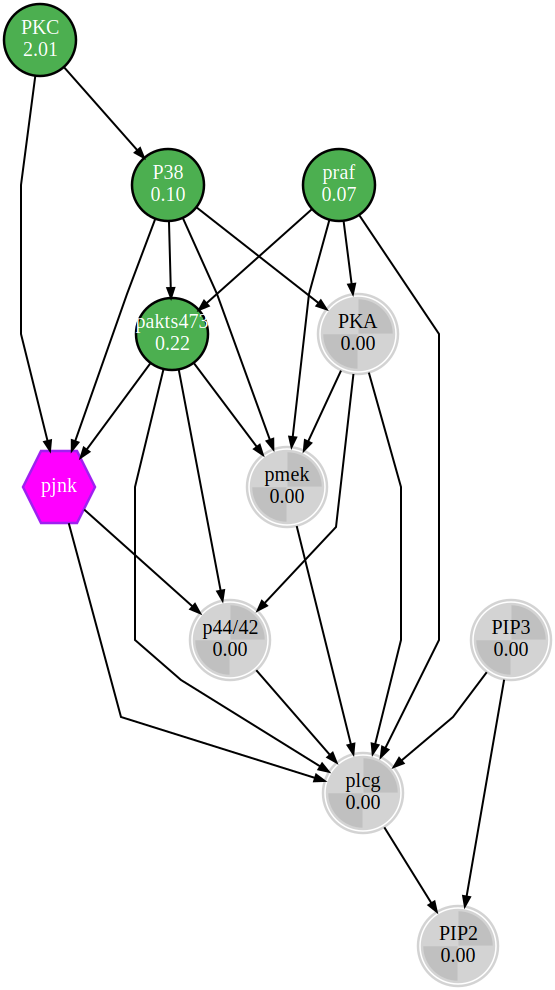

GS
No graph
CCDR


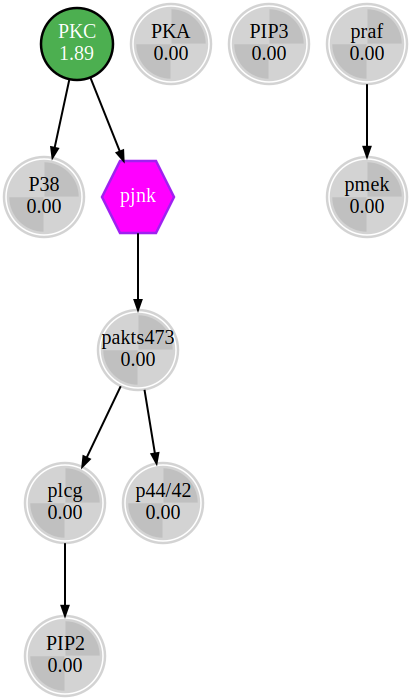

IAMB
No graph
SAM
No graph
BES


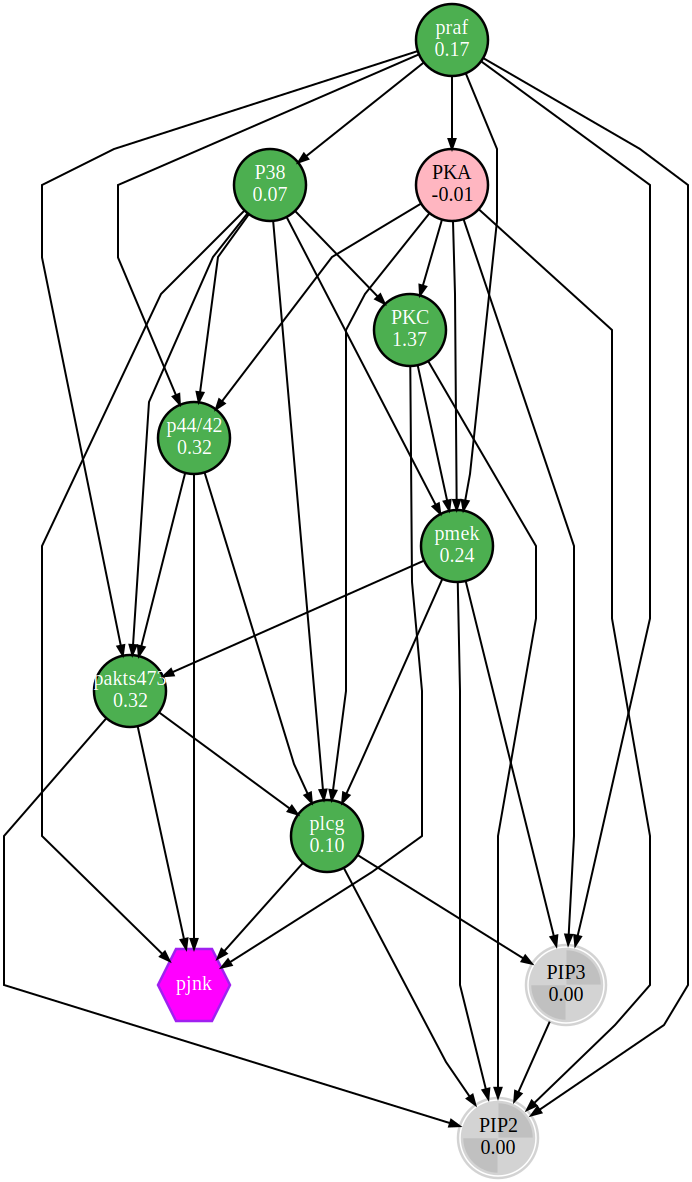

GRASP
No graph
CGNN
No graph


In [17]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))